# **Bring Your Own Project (BYOP) : IPBA Batch - 8**

# **Group - F**  


## **Team Mentor - Suraaj**


### **Topic :   Price Optimization** 

## **Domain: Ecommerce Marketplace**

###**About the Business:** 

Olist was founded in February 2015 by Tiago Dalvi, as a derivation of Solidarium, a company created in 2007 as a shopping store that later became a marketplace for the sale of handcrafted products
Olist is a Brazilian startup that operates in the e-commerce segment , mainly through the marketpalce . 
It also concentrates sellers who wish to advertise in marketplaces such as Mercado Livre, B2W , Via Varejo and Amazon . On the other hand, it concentrates the products of all sellers in a single store that is visible to the final consumer.
It provides establishments of a platform for entrepreneurs with online retailers allowing them to easily advertise and market their products while also assisting them in reaching out to a global audience

## **Problem Statement :**


Pricing a product is a crucial aspect in any business. A lot of thought process is put into it. There are different strategies to price different kinds of products. The impact on revenue generation of olist ecommerce company based on various product parameters. Multiple parameters like order status, price, payment, customer location etc.
There are products whose sales are quite sensitive to their prices and as such a small change in their price can lead to noticeable change in their sales. 

**Our goal is to help the Brazilian ecommerce giant using the historic customer data set available to build a price optimization model that would increase more sales and generate more revenue. 
We also have aspirations to merge the marketing funnel data set with customer data set to understand how different marketing channels lead people to our website and how that impacts total number of conversions.** 

#### **Along with what’s mentioned above, we want to help the company to solve the below listed business questions :**

 1) How number of orders changes when some sale is running on ?

 2) How is the variability of the demand history ? 

 3) Are there any outliers that we can observe in the sales distribution

 4) Are there any temporal patterns in sales behaviour that can be exploited?

 5) Possible pricing issues that have escaped their attention

 6) Are there any avenues to cross-sell/up-sell/bundle certain products?

 7) Aspirations to suggest the company around the inventory management using historic data

 8) Remedies to the issues identified above

## **Expectations :** 


* We intend to create a presentation with key findings/ insights from the data and their recommendations to the business.


* Understand and suggest a price optimization model which might help the business to drive more conversions. 

### **Data Source :**


* https://www.kaggle.com/olistbr/brazilian-ecommerce 

**The data is divided in multiple datasets for better understanding and organization.**

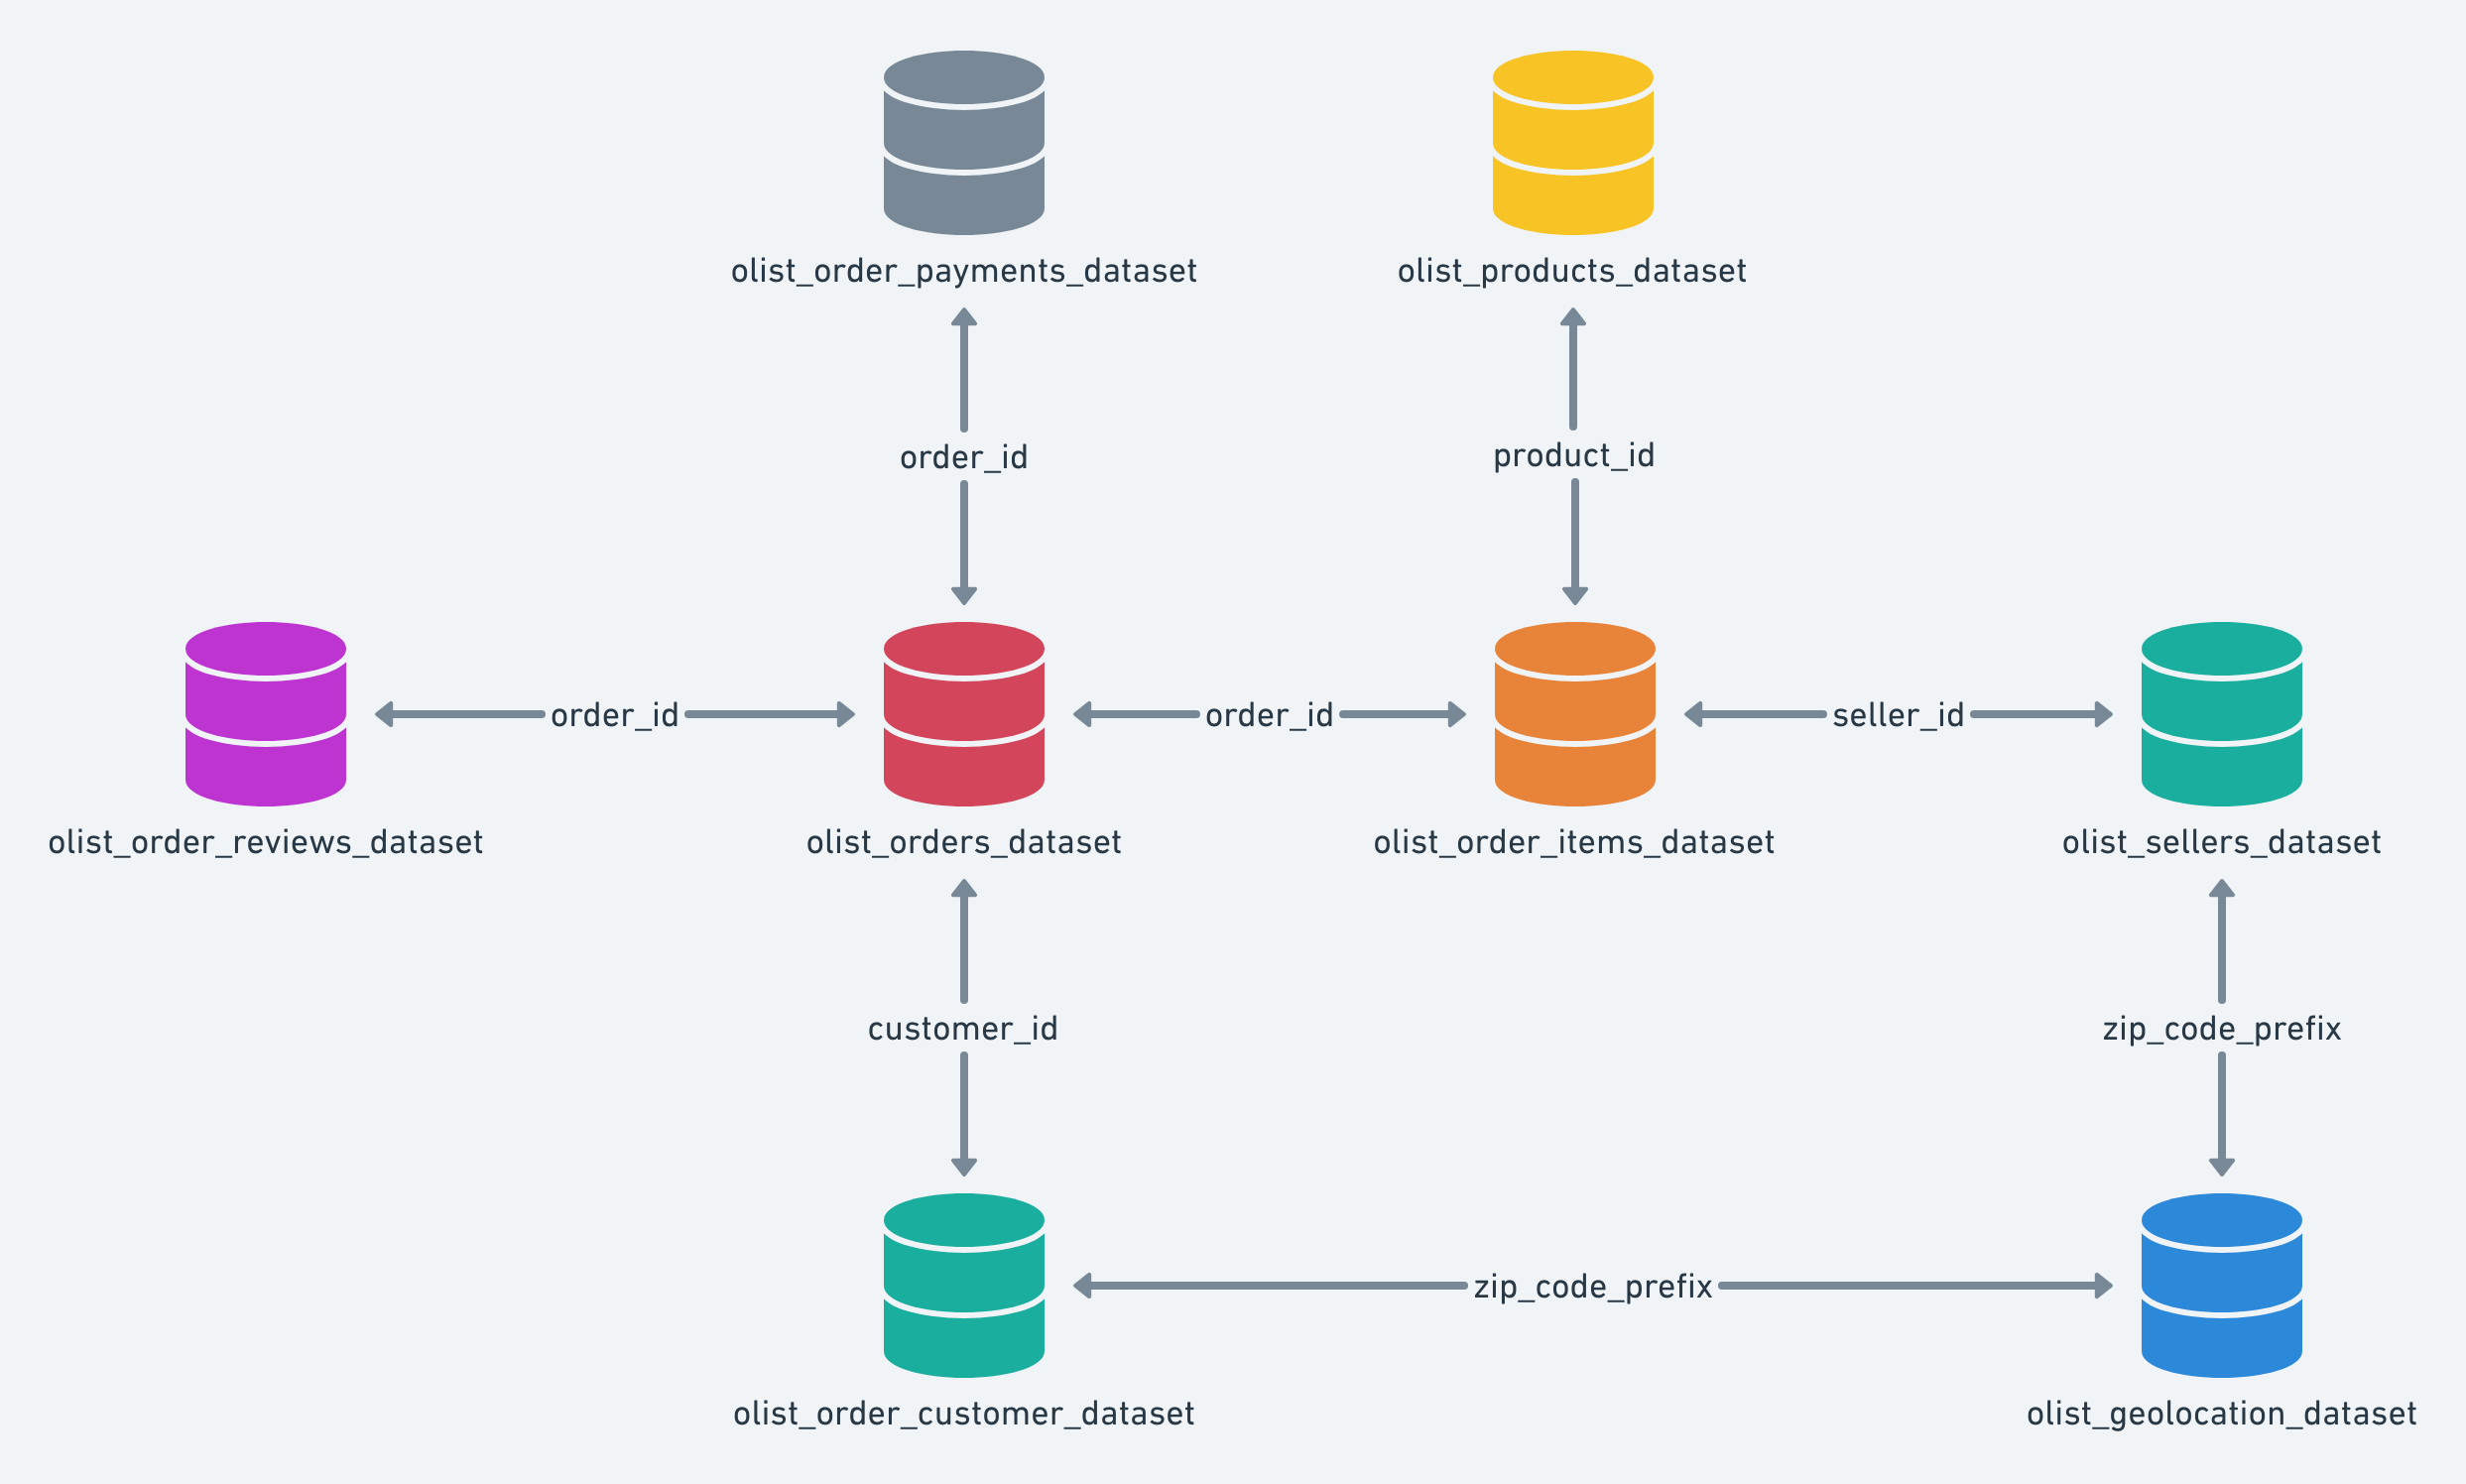

In [1]:
from IPython.display import Image
Image(filename='Data Schema.png')

## **Data Description**

**Each feature or columns of different csv files are described below:**

#### The olist_customers_dataset.csv contain following features:
    
                                   

* **customer_id :**                         	  Id of the consumer who made the purchase.


* **customer_unique_id :** 	                      Unique Id of the consumer.


* **customer_zip_code_prefix :**       	          Zip Code of the location of the consumer.


* **customer_city :**                    	      Name of the City from where order is made.


* **customer_state :**	                          State Code from where order is made(Ex- sao paulo-SP).

#### The olist_sellers_dataset.csv contains following features:


* **seller_id :**            	                Unique Id of the seller registered in olist.


* **seller_zip_code_prefix :**	                Zip Code of the location of the seller.


* **seller_city :**                       	    Name of the City of the seller.


* **seller_state :**                     	    State Code (Ex- sao paulo-SP)

#### The olist_order_items_dataset.csv contain following features:


* **order_id :**                 	A unique id of order made by the consumers.


* **order_item_id :**           	A Unique id given to each item ordered in the order.


* **product_id :**           	    A unique id given to each product available on the site.


* **seller_id :**            	    Unique Id of the seller registered in olist.


* **shipping_limit_date :**  	    The date before which shipping of the ordered product must be completed.


* **price :**               	    Actual price of the products ordered .


* **freight_value :**       	   Price rate at which a product is delivered from one point to another.

#### The olist_order_payments_dataset.csv contain following features:



* **order_id :**                	    A unique id of order made by the consumers.


* **payment_sequential :**         	    sequences of the payments made in case of EMI.


* **payment_type :**                	mode of payment used.(Ex-Credit Card)


* **payment_installments :**         	number of installments in case of EMI purchase.


* **payment_value :**                	Total amount paid for the purshase order.

#### The olist_orders_dataset.csv contain following features:


* **order_id :**                  	        A unique id of order made by the consumers.


* **customer_id :**                     	Id of the consumer who made the purchase.


* **order_status :**                     	status of the order made i.e delivered, shipped etc.


* **order_purchase_timestamp :**          	Timestamp of the purchase.


* **order_approved_at :**                    Timestamp of the order approval.


* **order_delivered_carrier_date :**         	delivery date at which carrier made the delivery.


* **order_delivered_customer_date :**          	date at which customer got the product.


* **order_estimated_delivery_date :**        	estimated delivery date of the products.

#### The olist_order_reviews_dataset.csv contain following features:



* **review_id :**                      	Id of the review given on the product ordered by the order id.


* **order_id :**                       	A unique id of order made by the consumers.


* **review_score :**                    	review score given by the customer for each order on the scale of 1–5.


* **review_comment_title**                   	Title of the review


* **review_comment_message :**               	Review comments posted by the consumer for each order.


* **review_creation_date :**                    Timestamp of the review when it is created.


* **review_answer_timestamp :**               	Timestamp of the review answered.

#### The olist_products_dataset.csv contain following features:



* **product_id :**                    	A unique identifier for the proposed project.


* **product_category_name :**           	Name of the product category


* **product_name_lenght :**        	length of the string which specify the name given to the products ordered.


* **product_description_lenght :**      	length of the description written for each product ordered on the site.


* **product_photos_qty :**        	Number of photos of each product ordered available on the shopping portal.


* **product_weight_g :**            	Weight of the products ordered in grams.


* **product_length_cm :**        	Length of the products ordered in centimeters.


* **product_height_cm :**         	Height of the products ordered in centimeters.


* **product_width_cm :**            	width of the product ordered in centimeters.

# **Part - 1 : Data Cleaning + EDA**

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from viz_utils import *

In [3]:
# reading all files

customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

In [4]:
customers.shape

(99441, 5)

In [5]:
geolocation.shape

(1000163, 5)

In [6]:
orders.shape

(99441, 8)

In [7]:
items.shape

(112650, 7)

In [8]:
payments.shape

(103886, 5)

In [9]:
reviews.shape

(99224, 7)

In [10]:
products.shape

(32951, 9)

In [11]:
sellers.shape

(3095, 4)

In [12]:
product_category.shape

(71, 2)

### **Checking no. of null values**

In [13]:
datasets = [customers, geolocation, items, payments, orders, products, reviews, sellers, product_category]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","product_category"]

info_df_n = pd.DataFrame({},)

info_df_n['dataset']= titles

#creating column of name of columns in the dataset 
info_df_n['cols'] = [', '.join([col for col, null in df.isnull().sum().items() ]) for df in datasets]

#creating total number of columns in the dataset 
info_df_n['cols_no']= [df.shape[1] for df in datasets]

#counting total null values
info_df_n['null_no']= [df.isnull().sum().sum() for df in datasets]

#creating total number of columns in the dataset with null-values 
info_df_n['null_cols_no']= [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

#creating column of name of columns in the dataset with null-values 
info_df_n['null_cols'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]


info_df_n.style.background_gradient(cmap='Blues')

,dataset,cols,cols_no,null_no,null_cols_no,null_cols
0,customers,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",5,0,0,
1,geolocations,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",5,0,0,
2,items,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",7,0,0,
3,payments,"order_id, payment_sequential, payment_type, payment_installments, payment_value",5,0,0,
4,orders,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
5,products,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
6,reviews,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",7,145903,2,"review_comment_title, review_comment_message"
7,sellers,"seller_id, seller_zip_code_prefix, seller_city, seller_state",4,0,0,
8,product_category,"product_category_name, product_category_name_english",2,0,0,


### Observation(s):


* Products dataset contains least number of null- values but most of its columns has null-values.


* The maximum number of null-values are present in reviews dataset and the name of the columns with the null-values are            review_comment_title and review_comment_message.


* We have to deal with these null-values in future.

In [14]:
customers.isnull().sum()    #checking missing values

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [15]:
customers.isnull().sum()*100/len(customers)    #checking missing values in % wise

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

In [16]:
geolocation.isnull().sum()   #checking missing values

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [17]:
geolocation.isnull().sum()*100/len(geolocation)  #checking missing values in % wise

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

In [18]:
items.isnull().sum()  # checking missing values

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
items.isnull().sum()*100/len(items)   # checking missing values in % wise

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [20]:
payments.isnull().sum()      # checking missing values

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
payments.isnull().sum()*100/len(payments)     # checking missing values in % wise

order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

In [22]:
orders.isnull().sum()      # checking missing values

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [23]:
orders.isnull().sum()*100/len(orders)     # checking missing values in % wise

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [24]:
products.isnull().sum()       # checking missing values

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
products.isnull().sum()*100/len(products)        # checking missing values in % wise

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [26]:
reviews.isnull().sum()     # checking missing values

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [27]:
reviews.isnull().sum()*100/len(reviews)      # checking missing values in % wise

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

In [28]:
sellers.isnull().sum()      # checking missing values

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [29]:
sellers.isnull().sum()*100/len(sellers)      # checking missing values in % wise

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

In [30]:
product_category.isnull().sum()      # checking missing values

product_category_name            0
product_category_name_english    0
dtype: int64

In [31]:
product_category.isnull().sum()*100/len(product_category)    # checking missing values in % wise

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

**Below we will check data types because it will help us in further analysis especially while we doing EDA in terms of Univariate analysis, Bivariate analysis and Multivariate analysis**

In [32]:
#checking dtypes
datasets = [customers,geolocation,items, payments, orders, products,reviews,sellers, product_category]
titles = ["customers","geolocations","items", "payments", "orders", "products","reviews","sellers","product_category"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Blues')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
2,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
3,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
4,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
5,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
6,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
7,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
8,product_category,0,,2,"product_category_name, product_category_name_english",0


### Observation(s):

* Orders dataset has maximum number of features of object dtype


* Products dataset has maximum number of numerical features(i.e dtype :'int16', 'int32', 'int64', 'float16', 'float32',            'float64').


* We can also observe that all the timestamps are in object datatypes.So, we have to convert it into datetime type to do          analysis on these features.

# **Univariate Analysis** :

## **Total Orders on E-Commerce**

We know that e-commerce is really a growing trend in a global perspective. Let's dive into the orders dataset to see how this trend can be presented in Brazil, at least on the dataset range.

#### **How many orders we have for each status?**

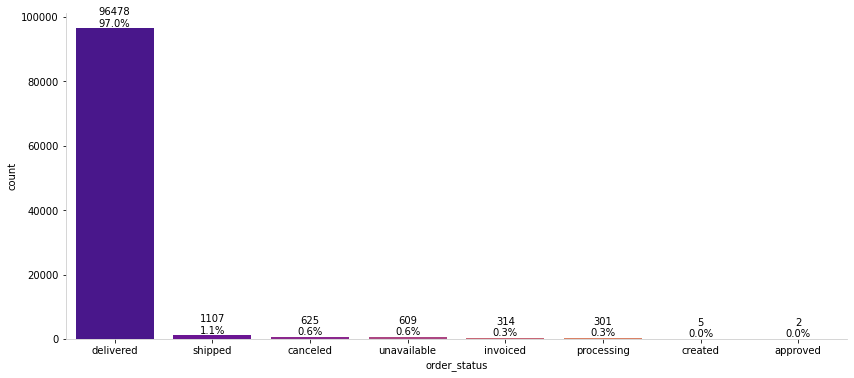

In [33]:
df_orders = orders.merge(customers, how='left', on='customer_id')
fig, ax = plt.subplots(figsize=(14, 6))
single_countplot(df_orders, x='order_status', ax=ax)
plt.show()

By the time this dataset was created, the highest amount of orders went   from delivered ones. Only 3% of all orders came from the other status.

#### **Is that a growing trend on e-commerce in Brazil? How can we describe a complete scenario?**

In [34]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


So now we can purpose a complete analysis on orders amount of brazilian e-commerce during the period of the dataset. 

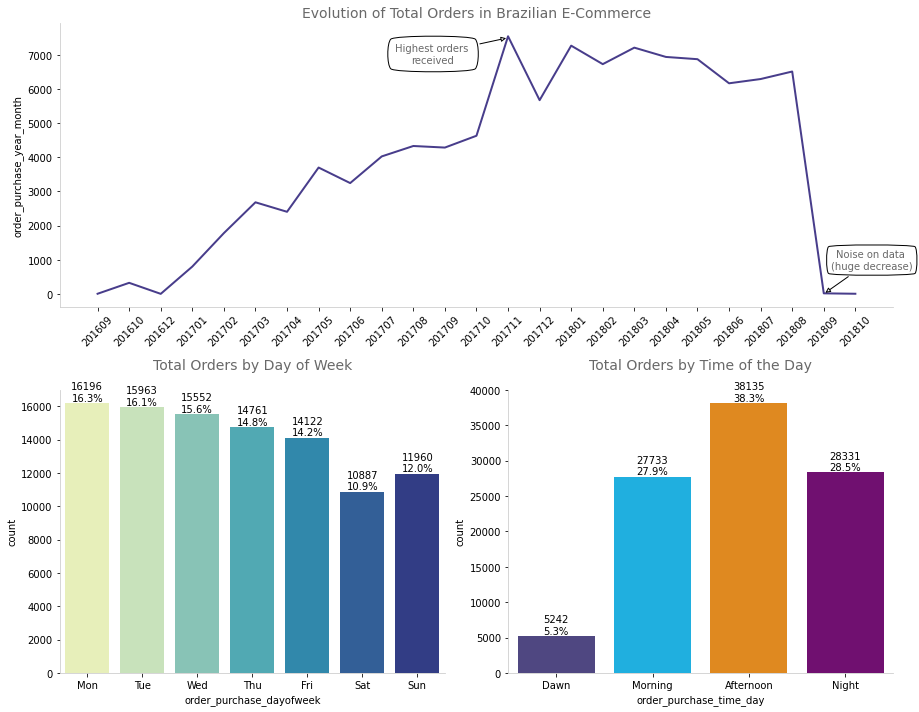

In [35]:
fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=df_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='darkslateblue', linewidth=2)
ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
format_spines(ax1, right_border=False)  
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')

# Barchart - Total of orders by day of week
single_countplot(df_orders, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(df_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

#### By the chart above we can conclude:

* E-commerce on Brazil really has a growing trend along the time. We can    see some seasonality with peaks at specific months, but in general   we can see clear that customers are more prone to buy things      online than before.


* Monday are the prefered day for brazilian's customers and they tend to    buy more at afternoons.


Obs: we have a sharp decrease between August 2018 and September 2018 and maybe the origin of that is related to noise on data. For further comparison between 2017 and 2018, let's just consider orders between January and August in both years

### **E-commerce: a comparison between 2017 and 2018**

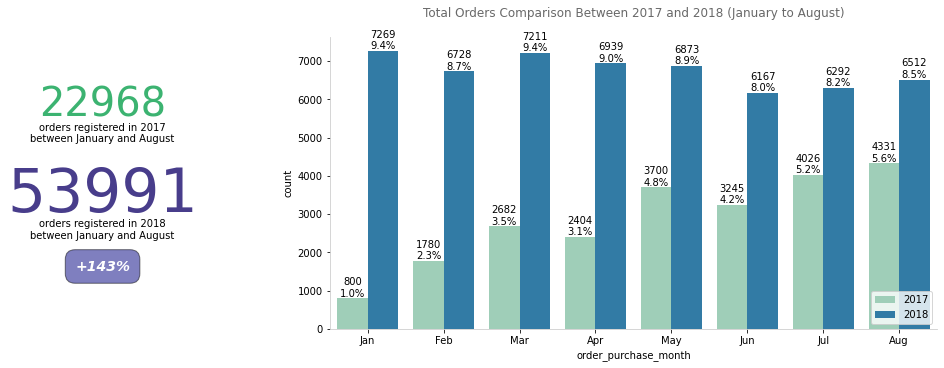

In [36]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
df_orders_compare = df_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = df_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='mediumseagreen', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='darkslateblue', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')

# Bar chart - Comparison between monthly sales between 2017 and 2018
single_countplot(df_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False,
                 palette='YlGnBu')
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
ax2.set_xticklabels(month_label)
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
plt.legend(loc='lower right')
plt.show()

**E-Commerce Around Brazil**

In [37]:
import json
import requests

In [38]:
# Merging orders and order_items
df_orders_items = df_orders.merge(items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = geolocation[geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,id,sigla,nome,nome_regiao,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,35,SP,São Paulo,Sudeste,3149.0,-23.583885,-46.587472,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018,7,Jul,201807,20180724,24,1,Tue,20,Night,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29,BA,Bahia,Nordeste,47813.0,-12.945893,-45.016313,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,52,GO,Goiás,Centro-Oeste,75265.0,-16.752735,-48.522139,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017,11,Nov,201711,20171118,18,5,Sat,19,Night,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,24,RN,Rio Grande do Norte,Nordeste,59296.0,-5.778488,-35.281450,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018,2,Feb,201802,20180213,13,1,Tue,21,Night,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,35,SP,São Paulo,Sudeste,9195.0,-23.760018,-46.524784,santo andre,SP


### **An overview of customer's order by region, state and city**

In [39]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

# Grouping data by region
df_regions_group = df_orders_filt.groupby(by=['order_purchase_year_month', 'nome_regiao'], as_index=False)
df_regions_group = df_regions_group.agg({'customer_id': 'count', 'price': 'sum'}).sort_values(by='order_purchase_year_month')
df_regions_group.columns = ['month', 'region', 'order_count', 'order_amount']
df_regions_group.reset_index(drop=True, inplace=True)

# Grouping data by city (top 10)
df_cities_group = df_orders_filt.groupby(by='geolocation_city', 
                                       as_index=False).count().loc[:, ['geolocation_city', 'order_id']]
df_cities_group = df_cities_group.sort_values(by='order_id', ascending=False).reset_index(drop=True)
df_cities_group = df_cities_group.iloc[:10, :]

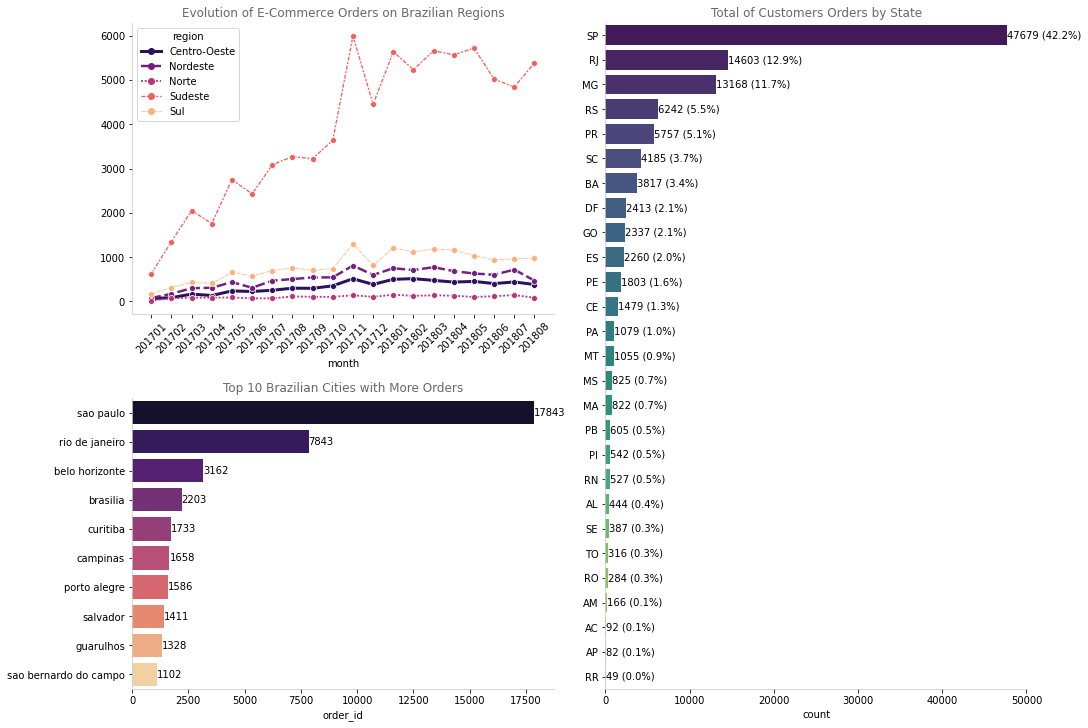

In [40]:
# Creating and preparing figure and axis
fig = plt.figure(constrained_layout=True, figsize=(15, 10))
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[:, 1])

# Count of orders by region
sns.lineplot(x='month', y='order_count', ax=ax1, data=df_regions_group, hue='region', 
             size='region', style='region', palette='magma', markers=['o'] * 5)
format_spines(ax1, right_border=False)
ax1.set_title('Evolution of E-Commerce Orders on Brazilian Regions', size=12, color='dimgrey')
ax1.set_ylabel('')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

# Top cities with more customers orders in Brazil
sns.barplot(y='geolocation_city', x='order_id', data=df_cities_group, ax=ax2, palette='magma')
AnnotateBars(n_dec=0, font_size=10, color='black').horizontal(ax2)
format_spines(ax2, right_border=False)
ax2.set_title('Top 10 Brazilian Cities with More Orders', size=12, color='dimgrey')
ax2.set_ylabel('')

# Total orders by state
single_countplot(y='customer_state', ax=ax3, df=df_orders_filt, palette='viridis')
ax3.set_title('Total of Customers Orders by State', size=12, color='dimgrey')
ax3.set_ylabel('')

plt.show()

 ###  **Regions -** 


* **Centro-oeste : Midwest**

* **Nordeste : North East**

* **Norte : North**

* **Sudeste : Southeast**

* **Sul : South**

## **E-Commerce Impact on Economy**

Now, we will analyze the money movemented by e-commerce by looking at order prices, freights and others.

#### **How about the e-commerce sales? Did they grow up over time?**

In [41]:
# Grouping data
df_month_aggreg = df_orders_filt.groupby(by=['order_purchase_year', 'order_purchase_year_month'], as_index=False)
df_month_aggreg = df_month_aggreg.agg({
    'order_id': 'count',
    'price': 'sum',
    'freight_value': 'sum'
})

# Adding new columns for analysis
df_month_aggreg['price_per_order'] = df_month_aggreg['price'] / df_month_aggreg['order_id']
df_month_aggreg['freight_per_order'] = df_month_aggreg['freight_value'] / df_month_aggreg['order_id']
df_month_aggreg.head()

,order_purchase_year,order_purchase_year_month,order_id,price,freight_value,price_per_order,freight_per_order
0,2017,201701,966,120312.87,16875.62,124.547484,17.469586
1,2017,201702,1998,247303.02,38977.60,123.775285,19.508308
2,2017,201703,3041,374344.30,57704.29,123.099079,18.975432
3,2017,201704,2697,359927.23,52495.01,133.454664,19.464223
4,2017,201705,4176,506071.14,80119.81,121.185618,19.185778


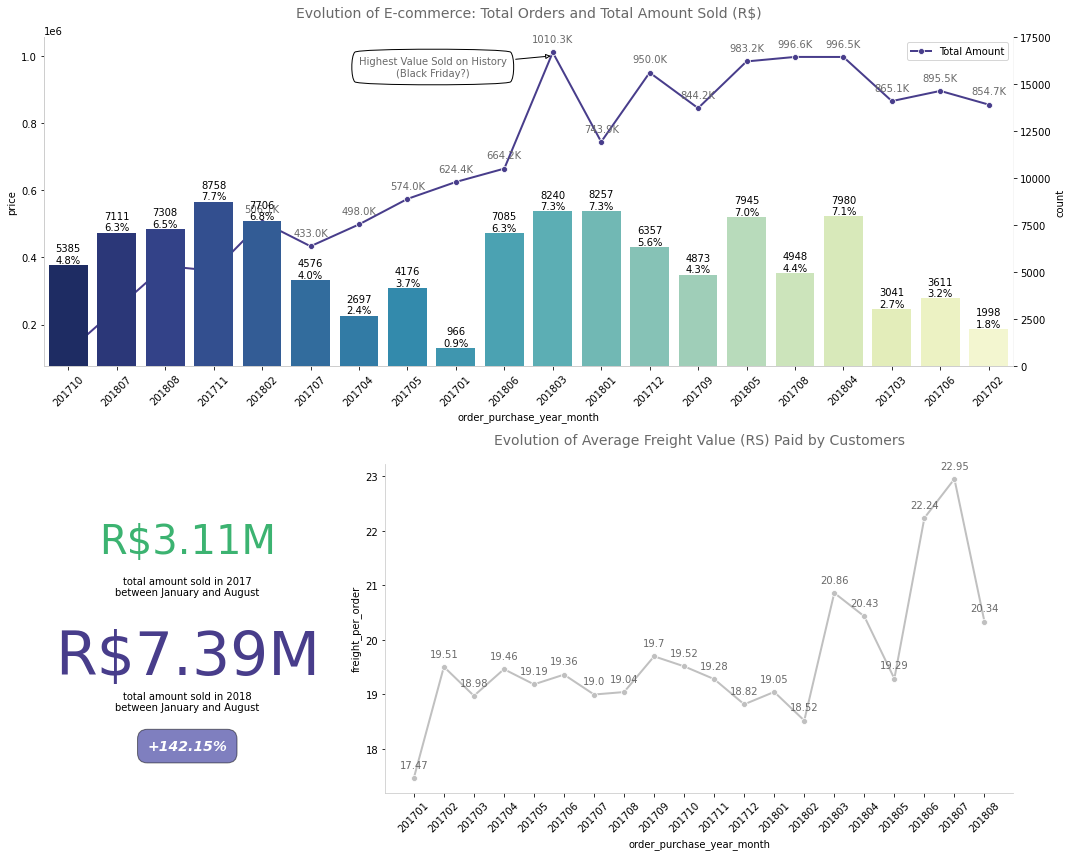

In [42]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1:])

# Plot 1 - Evolution of total orders and total sales on e-commerce
sns.lineplot(x='order_purchase_year_month', y='price', ax=ax1, data=df_month_aggreg, linewidth=2, 
             color='darkslateblue', marker='o', label='Total Amount')
ax1_twx = ax1.twinx()
single_countplot(df_orders_filt, x='order_purchase_year_month', ax=ax1_twx, order=False, palette='YlGnBu_r')
ax1_twx.set_yticks(np.arange(0, 20000, 2500))

# Customizing the first plot
format_spines(ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.price.items():
    ax1.annotate(str(round(y/1000, 1))+'K', xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax1.annotate(f'Highest Value Sold on History\n(Black Friday?)', (10, 1000000), xytext=(-120, -20), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.set_title('Evolution of E-commerce: Total Orders and Total Amount Sold (R$)', size=14, color='dimgrey', pad=20)

# Plot 2 - Big Numbers of Sales Evolution
month_comparison = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708',
                    '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808']
df_sales_compare = df_month_aggreg.query('order_purchase_year_month in (@month_comparison)')
sold_2017 = df_sales_compare.query('order_purchase_year == 2017')['price'].sum()
sold_2018 = df_sales_compare.query('order_purchase_year == 2018')['price'].sum()
growth = 1 + (sold_2017 / sold_2018)
ax2.text(0.50, 0.73, 'R$' + str(round(sold_2017/1000000, 2)) + 'M', fontsize=40, color='mediumseagreen', ha='center')
ax2.text(0.50, 0.60, 'total amount sold in 2017\nbetween January and August', fontsize=10, ha='center')
ax2.text(0.50, 0.36, 'R$' + str(round(sold_2018/1000000, 2)) + 'M', fontsize=60, color='darkslateblue', ha='center')
ax2.text(0.50, 0.25, 'total amount sold in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax2.text(0.50, 0.13, f'{signal}{str(round(100 * growth, 2))}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax2.axis('off')

# Plot 3 - Evolution of mean freight value paid by the customers
sns.lineplot(x='order_purchase_year_month', y='freight_per_order', data=df_month_aggreg, linewidth=2, 
             color='silver', marker='o', ax=ax3)
format_spines(ax3, right_border=False)
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)
for x, y in df_month_aggreg.freight_per_order.items():
    ax3.annotate(round(y, 2), xy=(x, y), textcoords='offset points', xytext=(0, 10),
                ha='center', color='dimgrey')
ax3.set_title('Evolution of Average Freight Value (RS) Paid by Customers', size=14, color='dimgrey', pad=20)

plt.tight_layout()
plt.show()

#### **How the total sales (sum of price) are concentraded in brazilian states?**

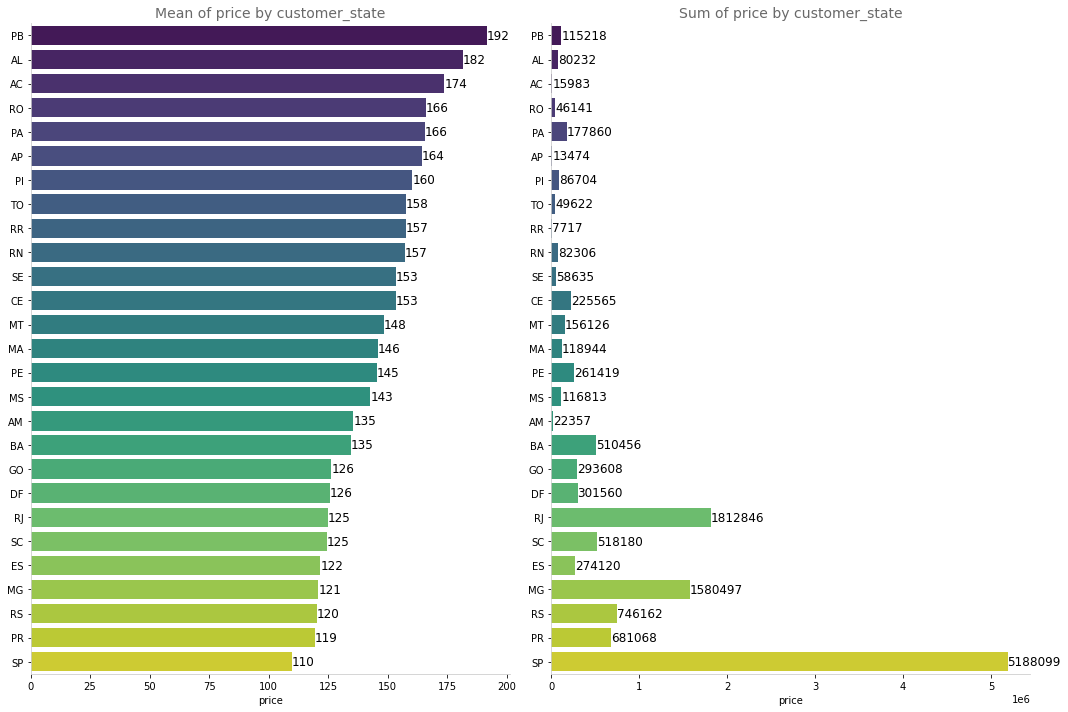

In [43]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'price', palette='viridis', figsize=(15, 10))

It's very interesting to see how some states have a high total amount sold and a low price per order. If we look at SP (São Paulo) for example, it's possible to see that it is the state with most valuable state for e-commerce (5,188,099 sold) but it is also where customers pay less per order (110.00 per order).

**How about the freight?**

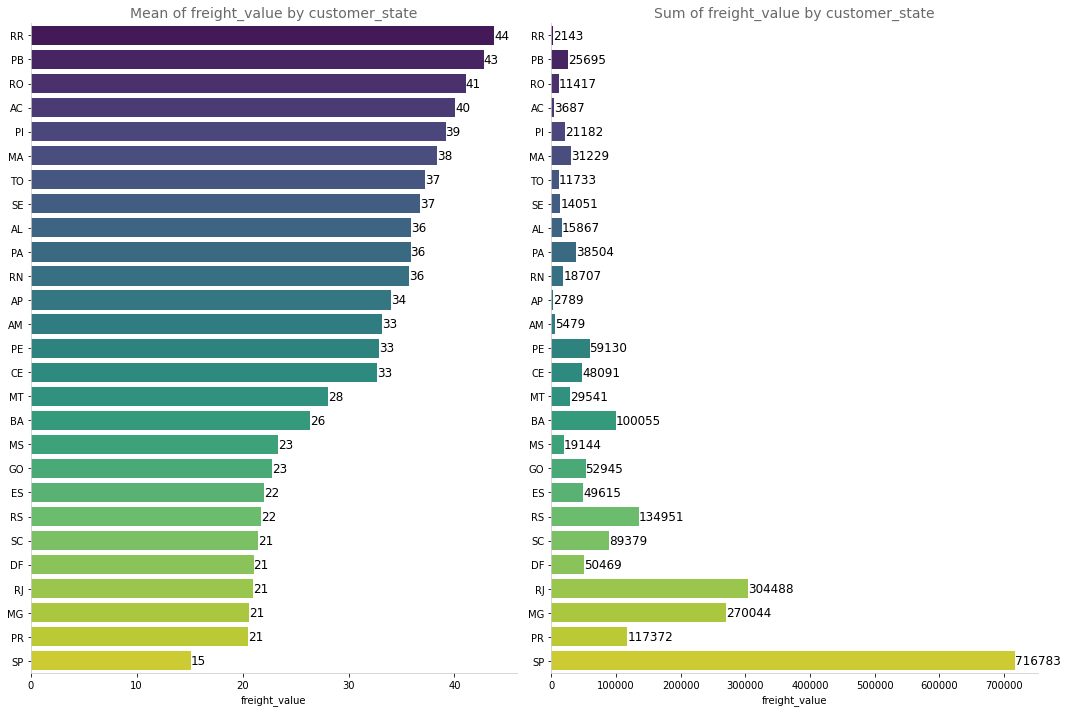

In [44]:
mean_sum_analysis(df_orders_filt, 'customer_state', 'freight_value', palette='viridis', figsize=(15, 10))

Here we can get insights about the customers states with highest mean freight value. For example, customers in Roraima (RR), Paraíba (PB), Rondônia (RO) and Acre (AC) normaly pays more than anyone on freights.

## **Payment Type Analysis**

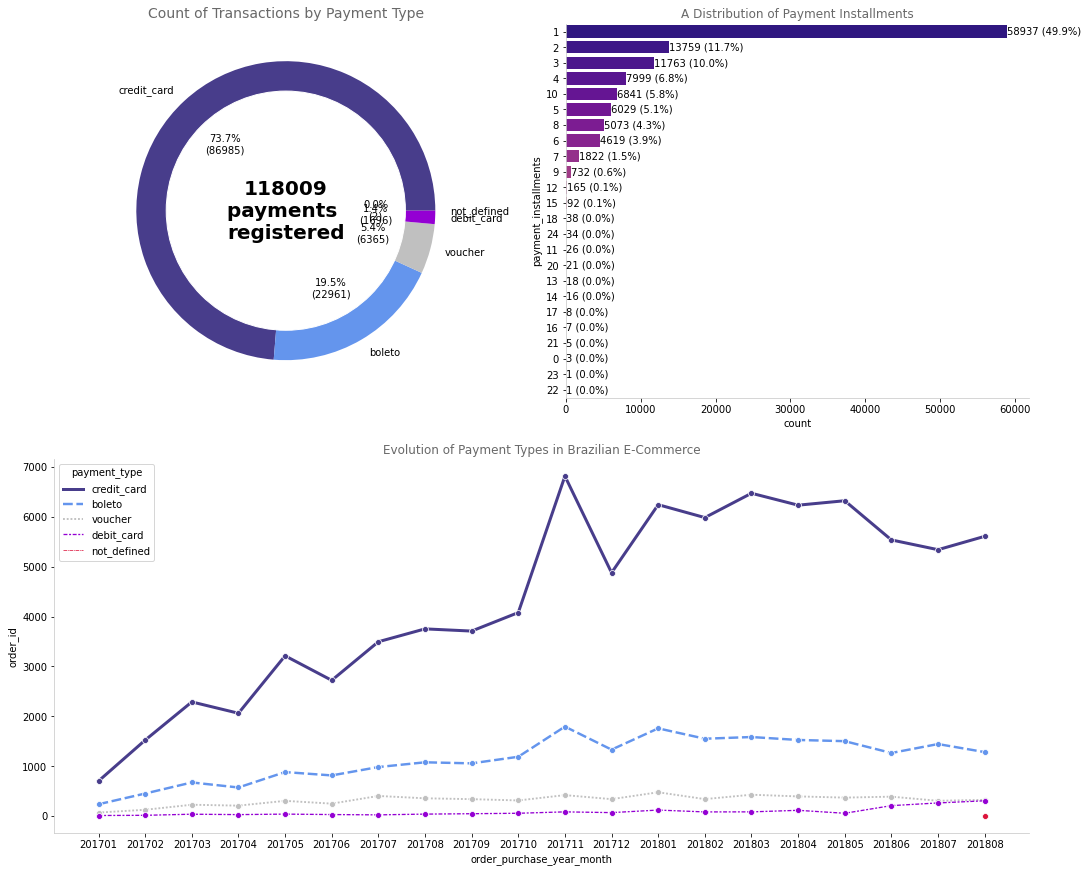

In [45]:
# Grouping data
df_orders_pay = df_orders_filt.merge(payments, how='left', on='order_id')

# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(15, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Plot 1 - Payment types in a donut chart
colors = ['darkslateblue', 'cornflowerblue', 'silver', 'darkviolet', 'crimson']
label_names = df_orders_pay['payment_type'].value_counts().index
donut_plot(df_orders_pay, col='payment_type', ax=ax1, label_names=label_names, colors=colors,
           title='Count of Transactions by Payment Type', text=f'{len(df_orders_pay)}\npayments \nregistered')

# Plot 2 - Payment installments
single_countplot(df_orders_pay, ax=ax2, y='payment_installments')
ax2.set_title('A Distribution of Payment Installments', color='dimgrey', size=12)

# Plot 3 - Evolution of payment types
payment_evl = df_orders_pay.groupby(by=['order_purchase_year_month', 'payment_type'], as_index=False).count()
payment_evl = payment_evl.loc[:, ['order_purchase_year_month', 'payment_type', 'order_id']]
payment_evl = payment_evl.sort_values(by=['order_purchase_year_month', 'order_id'], ascending=[True, False])
sns.lineplot(x='order_purchase_year_month', y='order_id', data=payment_evl, ax=ax3, hue='payment_type',
             style='payment_type', size='payment_type', palette=colors, marker='o')
format_spines(ax3, right_border=False)
ax3.set_title('Evolution of Payment Types in Brazilian E-Commerce', size=12, color='dimgrey')
plt.show()

In fact, we can see by the line chart that payments made by credit card really took marjority place on brazilian e-commerce. Besides that, since 201803 it's possible to see a little decrease on this type of payment. By the other side, payments made by debit card is showing a growing trend since 201805, wich is a good opportunity for investor to improve services for payments like this.

On the bar chart above, we can see how brazilian customers prefer to pay the orders: mostly of them pay once into 1 installment and it's worth to point out the quantity of payments done by 10 installments.

## **Merging all datasets**

In [46]:
rev_new = reviews.drop(['review_comment_title','review_creation_date','review_id','review_answer_timestamp'],axis=1)

In [47]:
df = pd.merge(orders,payments, on="order_id")
df = df.merge(customers, on="customer_id")
df = df.merge(items, on="order_id")
df = df.merge(products, on="product_id")
df = df.merge(product_category, on="product_category_name")
df = df.merge(rev_new, on="order_id")
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [48]:
df.shape

(115609, 33)

In [49]:
df.isnull().sum()    # checking missing values

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

Handling Missing values in Timestamps

* The order of different types of timestamps are shown below:

  order_purchase_timestamp-->order_approved_at--> order_delivered_carrier_date-->order_delivered_customer_date--                  >order_estimated_delivery_date


* Timestamps containg missing values are order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.


* null-values in order_approved_at can be replaced by order_purchase_timestamp and null-values in order_delivered_customer_date    can be replaced by order_estimated_delivery_date


* we can drop the column order_delivered_carrier_date.

In [50]:
#Handling missing values
index = (df[df['order_delivered_customer_date'].isnull() == True].index.values)

df["order_approved_at"].fillna(df["order_purchase_timestamp"], inplace=True)
df["order_delivered_customer_date"].fillna(df["order_estimated_delivery_date"], inplace=True)

#dropping order delivery carrier date
df.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)

In [51]:
#checking the replaced values
df.order_estimated_delivery_date[index[0]]

'2017-07-06 00:00:00'

In [52]:
df.order_delivered_customer_date[index[0]]

'2017-07-06 00:00:00'

In [53]:
# Handling missing values of numerical features
df['product_weight_g'].fillna(df['product_weight_g'].median(),inplace=True)
df['product_length_cm'].fillna(df['product_length_cm'].median(),inplace=True)
df['product_height_cm'].fillna(df['product_height_cm'].median(),inplace=True)
df['product_width_cm'].fillna(df['product_width_cm'].median(),inplace=True)

In [54]:
#Handling missing values of text column
print("Percentage of null reviews :",(df.review_comment_message.isnull().sum()/len(df))*100 ,"%")
# filling null value of review comments with no_review
df['review_comment_message'].fillna('nao_reveja',inplace=True)

Percentage of null reviews : 57.697065107387836 %


## **Data Dedublicate**

In [55]:
dup_rows = df[df.duplicated(['order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date','customer_unique_id','review_comment_message'])]
dup_rows.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
8,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,2,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja
9,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,3,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja
10,82bce245b1c9148f8d19a55b9ff70644,388025bec8128ff20ec1a316ed4dcf02,delivered,2017-04-20 17:15:46,2017-04-21 05:15:56,2017-05-10 09:17:55,2017-05-12 00:00:00,1,boleto,1,267.80,f9effeed3df9ae063a58c0759b96f8b2,85804,cascavel,PR,4,a5a0e71a81ae65aa335e71c06261e260,c8417879a15366a17c30af34c798c332,2017-04-27 05:15:56,38.00,15.56,utilidades_domesticas,57.0,698.0,3.0,705.0,34.0,22.0,28.0,housewares,1,nao_reveja


As we can observe the **duplicate rows** like the row with **"order_id : 82bce245b1c9148f8d19a55b9ff70644"**  all the columns are the same.

we can drop these rows keeping the first.

In [56]:
#Deduplication of entries
df= df.drop_duplicates(subset={'order_id','customer_id','order_purchase_timestamp','order_delivered_customer_date'}, keep='first', inplace=False)
df=df.reindex()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13 00:00:00,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,3,nao_reveja
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21 00:00:00,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,1,"Inicialmente, na data da compra o produto era ..."


In [57]:
df.shape

(96516, 32)

## **Time for lil Statistics**

In [58]:
# all time stamps are in object dtype as observed above converting it into dataetime 
df[['order_purchase_timestamp','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date',]]=df[['order_purchase_timestamp',
       'order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']].apply(pd.to_datetime)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96516 entries, 0 to 115608
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96516 non-null  object        
 1   customer_id                    96516 non-null  object        
 2   order_status                   96516 non-null  object        
 3   order_purchase_timestamp       96516 non-null  datetime64[ns]
 4   order_approved_at              96516 non-null  datetime64[ns]
 5   order_delivered_customer_date  96516 non-null  datetime64[ns]
 6   order_estimated_delivery_date  96516 non-null  datetime64[ns]
 7   payment_sequential             96516 non-null  int64         
 8   payment_type                   96516 non-null  object        
 9   payment_installments           96516 non-null  int64         
 10  payment_value                  96516 non-null  float64       
 11  customer_uniqu

In [60]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000,96516.000000
mean,1.022545,2.919858,157.924421,35163.974543,1.016205,125.777851,20.220468,48.846253,794.118188,2.251015,2106.227133,30.147955,16.507771,23.061855,4.107412
std,0.247935,2.711997,216.773702,29810.746531,0.145692,189.535209,15.931328,9.995674,654.863686,1.746647,3764.648279,16.154906,13.339701,11.744019,1.329213
min,1.000000,0.000000,0.010000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.065000,11368.750000,1.000000,41.900000,13.300000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,103.190000,24422.000000,1.000000,79.000000,16.390000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,175.392500,59015.000000,1.000000,139.900000,21.260000,57.000000,996.000000,3.000000,1813.000000,38.000000,20.000000,30.000000,5.000000
max,27.000000,24.000000,13664.080000,99980.000000,7.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


### Observation(s):

* We can observe from the above table except customer_zip_code_prefix, order_item_id and review_score features we have 12          numerical features in our final dataset.


* Also,We can observe the statistics like percentile values , mean and standard deviation values, count , min and max of the      numerical featues.For payment_value, the maximum payment value of an order is 13664 Brazilian real.


* For the price and freight value of an order. The maximum price of an order is 6735 while max freight is around 410 Brazilian    real. The average price of an order is around 125 Brazilian real and frieght value is around 20 Brazilian real. The order      with minimum price of 0.85 Brazilian real have been made.


* Similarly, we can observe the other features further we will see the distribution of these features and see how they are       helping in classifying the class labels and find other insights.

In [61]:
df.review_score.value_counts()

5    56185
4    18732
1    10598
3     7978
2     3023
Name: review_score, dtype: int64

In [62]:
def partition(x):
    if x < 3:
        return 0
    return 1
df['review_score']=df['review_score'].map(lambda cw : partition(cw) ) 
    
# checking the review score now
df.review_score.value_counts()

1    82895
0    13621
Name: review_score, dtype: int64

Total Positive Reviews : 82895 , ( 85.8873140204733 %)
Total Negative Reviews : 13621 , ( 14.11268597952671 %)




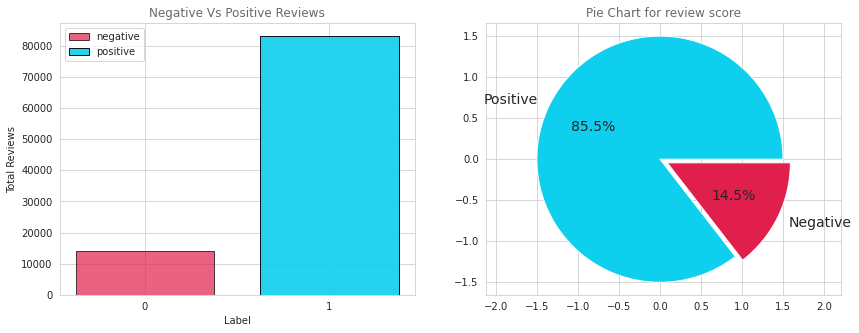

In [63]:
#counting the review score with 1 and 0
y_value_counts = df.review_score.value_counts()

#calculating the percentage of each review type
print("Total Positive Reviews :", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Total Negative Reviews :", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print('\n')

#plotting bar-plot and pie chart
%matplotlib inline
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.ylabel('Total Reviews')
plt.xlabel('Label')
plt.title('Negative Vs Positive Reviews',color='dimgrey')
plt.xticks([10,10.20],['0','1'])
#creating bar plots
plt.bar(10,14112, color = '#e01f4c', width = 0.15,alpha=0.7,label='negative',edgecolor='black')
plt.bar(10.20,83143,color = '#0ecfed', width = 0.15,alpha=0.9,label='positive',edgecolor='black')
plt.legend()

plt.subplot(1,2,2)
labels = ['Positive','Negative']
sizes = [83143,14112]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
color={'#0ecfed','#e01f4c'}
plt.pie(sizes,explode=explode ,colors=color,labels=labels, autopct='%1.1f%%',shadow=False, startangle=0,radius=1.5,labeldistance=1.1,textprops={'fontsize': 14},frame=True, )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Pie Chart for review score',color='dimgrey')
plt.show()


### Observation(s):

* We can observe from the above plots 85.5% of the total reviews are positive i.e. 1 and only 14.5% reviews are negative i.e.     which means that the given data set is imbalanced dataset.

In [64]:
#Correlation matrix 
corr_matrix = df.corr()

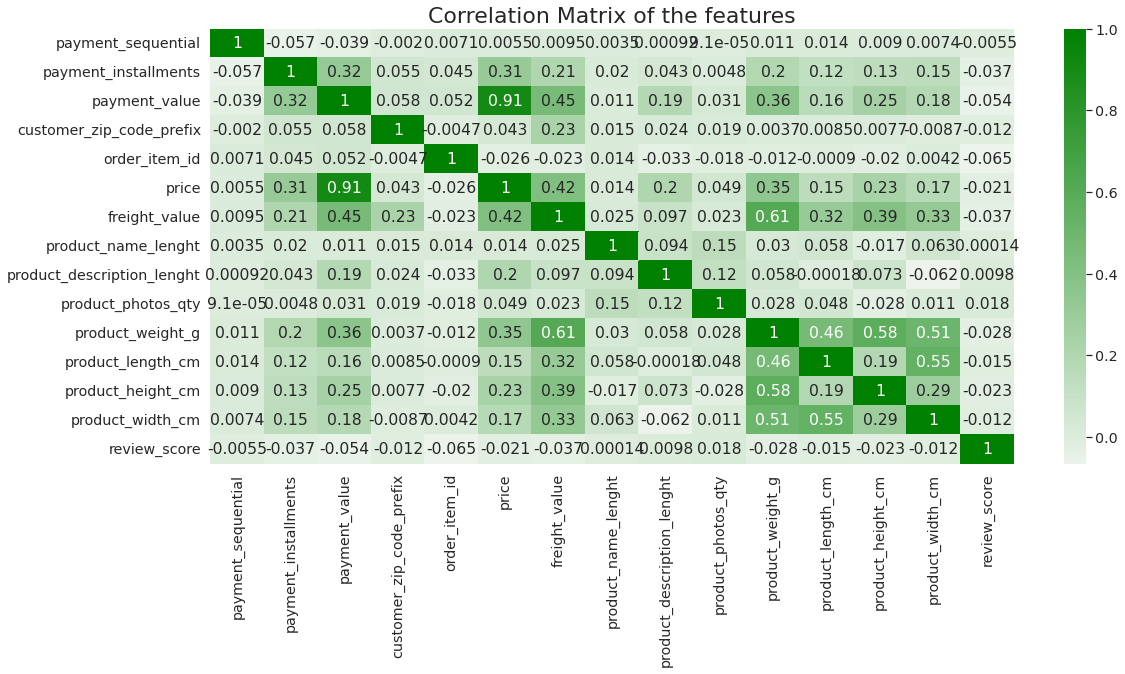

In [65]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.light_palette("green",as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap,annot=True)
plt.title("Correlation Matrix of the features",fontsize=22)
#plt.savefig('plot16.png', dpi=300, bbox_inches='tight')
plt.show()

### Observation(s):

* There is a strong positive correlation between: (payment_value and price), (product_weight_g and freight_value also with        product_width_cm), (product_length_cm and product_width_cm), (product_height_cm and product_weight_g).

In [66]:
#finding corr- values of the features with review_score
corr_matrix["review_score"].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.018062
product_description_lenght    0.009772
product_name_lenght           0.000142
payment_sequential           -0.005510
product_width_cm             -0.011653
customer_zip_code_prefix     -0.012370
product_length_cm            -0.015065
price                        -0.021429
product_height_cm            -0.023263
product_weight_g             -0.028432
freight_value                -0.036847
payment_installments         -0.037339
payment_value                -0.053558
order_item_id                -0.065218
Name: review_score, dtype: float64

In [67]:
#checking unique ids
print("Total number of unique seller_id:",len((df.seller_id).unique()))
print("Total number of unique product_id:",len((df.product_id).unique()))
print("Total number of unique customer_id:",len((df.customer_unique_id).unique()))

Total number of unique seller_id: 3017
Total number of unique product_id: 30905
Total number of unique customer_id: 93396


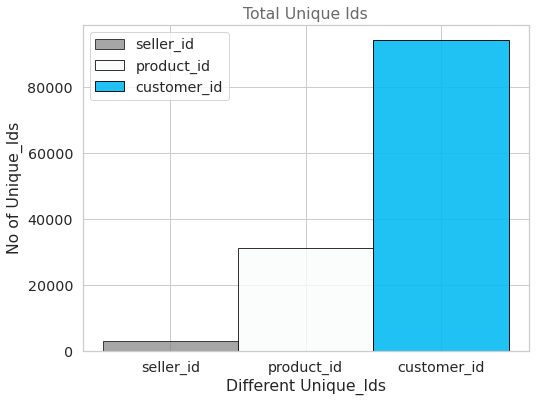

In [68]:
%matplotlib inline
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
plt.ylabel('No of Unique_Ids')
plt.xlabel('Different Unique_Ids')
plt.title('Total Unique Ids',color='dimgrey')
plt.xticks([10,10.25,10.50],['seller_id','product_id','customer_id'])
#creating bar plots
plt.bar(10,3022, color = 'grey', width = 0.25,alpha=0.7,label='seller_id',edgecolor='black')
plt.bar(10.25,31053, color = '#fafcfc', width = 0.25,alpha=0.8,label='product_id',edgecolor='black')
plt.bar(10.50,94087, color = '#07bbf2', width = 0.25,alpha=0.9,label='customer_id',edgecolor='black')
plt.legend()
plt.show()

### Observation:

* After comparing different ids it can be observed that the highest number of unique id is of customers and least is from         sellers

## Box Plot

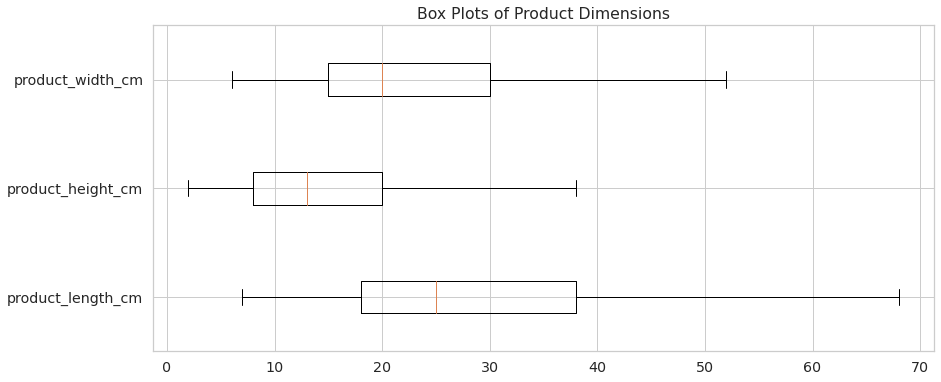

In [69]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(14,6))
 
box_plot_data=[df.product_length_cm,df.product_height_cm,df.product_width_cm]
plt.boxplot(box_plot_data,labels=['product_length_cm','product_height_cm','product_width_cm'],vert=False, showfliers = False)
plt.title("Box Plots of Product Dimensions")
#plt.savefig('plot24.png', dpi=400, bbox_inches='tight')
plt.show()

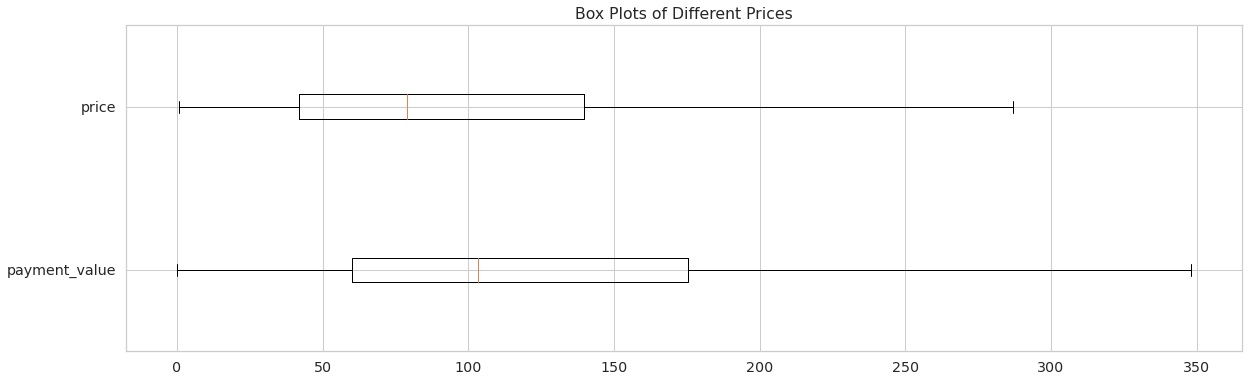

In [70]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,6))
 
box_plot_data=[df.payment_value,df.price]
plt.boxplot(box_plot_data,labels=['payment_value','price'],vert=False, showfliers = False)
plt.title("Box Plots of Different Prices")
#plt.savefig('plot25.png', dpi=400, bbox_inches='tight')
plt.show()

* The above box plots are showing the distribution of the numerical features product_width_cm, product_height_cm and product_width_cm. These features are overlapping each other.

# **Bivariate Analysis**

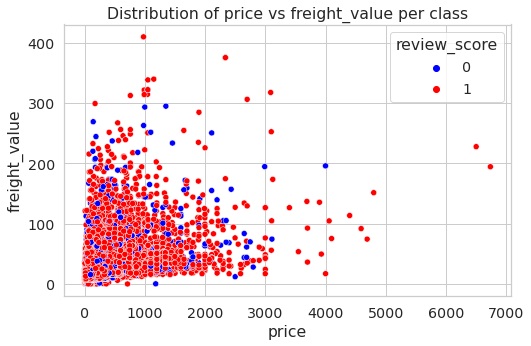

In [71]:
# Distribution of price vs freight_value per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='freight_value', data = df, hue="review_score",palette=['blue','red'])
plt.title('Distribution of price vs freight_value per class')
plt.show()

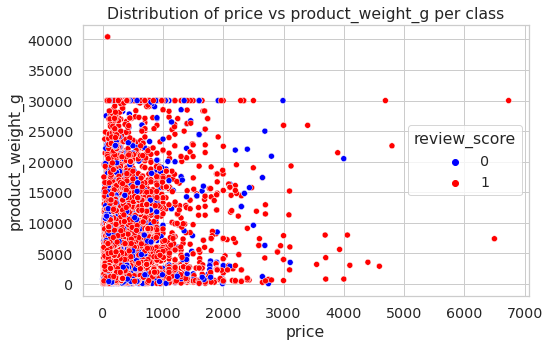

In [72]:
# Distribution of price vs product_weight_g per class
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
ax = sns.scatterplot(x='price',y='product_weight_g', data = df, hue="review_score",palette=['blue','red'])
plt.title('Distribution of price vs product_weight_g per class')
plt.show()

### Obervation(s):

* From the above two scatter plots titled Distribution of price vs freight_value per class and Distribution of price vs freight_value per class respectively, It is very hard to say anything about the reviews on the basis of these plot as data-points are not seperable based on reviews these are completely mixed data.

# **Multivariate Analysis**

In [73]:
#calulating number of days for the data is taken
print(df.order_approved_at.max() - df.order_approved_at.min(), ' from ', 
      df.order_approved_at.min(), ' to ', df.order_approved_at.max())

699 days 07:56:34  from  2016-10-04 09:43:32  to  2018-09-03 17:40:06


In [74]:
# Extracting attributes for purchase date - Year and Month
df['order_purchase_year'] = df['order_purchase_timestamp'].apply(lambda x: x.year) #gives year Example :2016-10-04 09:43:32 ---->2016
df['order_purchase_month'] = df['order_purchase_timestamp'].apply(lambda x: x.month) #gives month Example :2016-10-04 09:43:32 ---->10
df['order_purchase_month_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))#gives month in short form Example :2016-10-04 09:43:32 ---->10--> Oct
df['order_purchase_year_month'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))#gives month&year Example :2016-10-04 09:43:32 ---->201610
df['order_purchase_date'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))#gives month,yr and date  Example :2016-10-04 09:43:32 ---->20161004
df['order_purchase_month_yr'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime("%b-%y"))

# Extracting attributes for purchase date - Day and Day of Week
df['order_purchase_day'] = df['order_purchase_timestamp'].apply(lambda x: x.day)
df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df['order_purchase_dayofweek_name'] = df['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df['order_purchase_hour'] = df['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df['order_purchase_time_day'] = pd.cut(df['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_month_yr,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Não testei o produto ainda, mas ele veio corre...",2017,10,Oct,201710,20171002,Oct-17,2,0,Mon,10,Morning
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,credit_card,3,37.77,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,Deveriam embalar melhor o produto. A caixa vei...,2017,8,Aug,201708,20170815,Aug-17,15,1,Tue,18,Afternoon
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,credit_card,1,37.77,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,"Só achei ela pequena pra seis xícaras ,mais é ...",2017,8,Aug,201708,20170802,Aug-17,2,2,Wed,18,Afternoon
5,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,boleto,1,44.09,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,1,nao_reveja,2017,10,Oct,201710,20171023,Oct-17,23,0,Mon,23,Night
6,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-28 18:59:23,2017-12-21,1,credit_card,10,356.12,3e4fd73f1e86b135b9b121d6abbe9597,19400,presidente venceslau,SP,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares,0,"Inicialmente, na data da compra o produto era ...",2017,11,Nov,201711,20171124,Nov-17,24,4,Fri,21,Night


In [75]:
df_mm=df[['order_purchase_month_name','price']].groupby('order_purchase_month_name').sum()

In [76]:
pi = list(df_mm['price'])
li = list(df_mm.index)
#dict of months and price value
res = {li[i]: pi[i] for i in range(len(li))}

In [77]:
from collections import OrderedDict
mnths = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']
weeks=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
res = dict(OrderedDict(sorted(res.items(),key =lambda x:mnths.index(x[0]))))#sorting by month
print(res)

{'Jan': 944793.1800000303, 'Feb': 973912.5200000321, 'Mar': 1211684.9699999955, 'Apr': 1220808.3200000054, 'May': 1335529.2199999604, 'Jun': 1183381.570000002, 'Jul': 1248562.2399999802, 'Aug': 1295710.3799999715, 'Sep': 550710.1300000068, 'Oct': 621872.3200000086, 'Nov': 885910.4200000276, 'Dec': 666699.8200000111}


In [78]:
temp_3= pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg(lambda x: x.eq(1).sum())).reset_index()

# Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039


temp_3['total'] = list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('Avg','mean')]))['total'])
temp_3['Avg']   = list(pd.DataFrame(df.groupby('order_purchase_month_name')['review_score'].agg([('total','count'),('Avg','mean')]))['Avg'])
temp_3= temp_3.sort_values(by=['total'], ascending=True)

In [79]:
rem = {list(temp_3.order_purchase_month_name)[i]: list(temp_3.total)[i] for i in range(len(temp_3))}
rem = dict(OrderedDict(sorted(rem.items(),key =lambda x:mnths.index(x[0]))))
print(rem)

{'Jan': 7743, 'Feb': 8201, 'Mar': 9575, 'Apr': 9119, 'May': 10325, 'Jun': 9250, 'Jul': 10066, 'Aug': 10589, 'Sep': 4152, 'Oct': 4777, 'Nov': 7284, 'Dec': 5435}


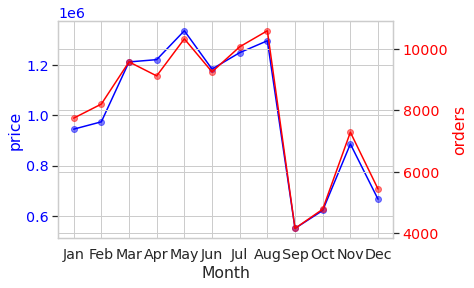

In [80]:
#https://matplotlib.org/2.2.5/gallery/api/two_scales.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")


fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('price', color=color)
ax1.plot(list(res.keys()),list(res.values()), color=color)
ax1.plot(list(res.keys()),list(res.values()),'C0o', alpha=0.5,color='blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('orders', color=color)  # we already handled the x-label with ax1
ax2.plot(list(res.keys()),list(rem.values()), color=color)
ax2.plot(list(res.keys()),list(rem.values()),'C0o', alpha=0.5,color='red')
ax2.tick_params(axis='y', labelcolor=color)
#creating  points 


#fig.tight_layout( )  # otherwise the right y-label is slightly clipped
plt.show()

* From the above plots we can observe that there is same pattern of total sales and the total order per month between 2016 and 2018.

* The above patterns shows that there must be noisy data present between  Sept,16 to Aug/Sept,18. This is the one of the reason that's why it shows sept sales down.

# **Part - 2 : Building Price Optimization Model**

## **Decision Tree Regression**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [82]:
def secondchoice(df, col):
      
    for k, v in enumerate(df[col].unique()):
        print(f'{k} - {v}')

    while True:
        secondchoice = str(input(f'Wich {choice} do you want to forecast? ')).strip().lower()
        if secondchoice.isnumeric():
            secondchoice = int(secondchoice)
            if secondchoice in range(0, len(df[col].unique())):
                break
        
        print(f'\nPlease type a number between 0 and {len(df[col].unique())-1}\n')

        filter = df[col].unique()[secondchoice]
    df = df[df[col] == filter]

    return (df, filter)

In [83]:
df_ord = pd.read_csv('olist_orders_dataset.csv')
df_ord_items = pd.read_csv('olist_order_items_dataset.csv')
df_ord_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_prod = pd.read_csv('olist_products_dataset.csv')

## **Filtering only the sales lines**

In [84]:
df_ord = df_ord[df_ord.order_status.isin(['delivered', 'invoiced', 'shipped', 'processing','approved'])]

## **First block**

In this block the DataFrames bellow were mergered in one DF that contains all information about Order Itens and Products.

df_order_items

df_products

In [85]:
df_ord_items_products = df_ord_items.merge(df_prod, how='left',on='product_id')
df_ord_items_products = df_ord_items_products.merge(df_ord_payments, how='left',on='order_id')

## **Second block**

In this block the output of the first blocks will be merged with df_products and all information thah we need will be in dataframe named df_complete.

In [86]:
df_complete = df_ord_items_products.merge(df_ord, how='left', on='order_id')
df_complete.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


## **Excluding unuseless data**

In [87]:
# excluding lines with missing data
df_complete = df_complete.dropna()

#excluding duplicated data
df_complete = df_complete.drop_duplicates().reset_index()

### **Creating estimated delivery time**

In [88]:
df_complete['order_purchase_timestamp'] = pd.to_datetime(df_complete['order_purchase_timestamp'], format="%Y-%m-%d %H:%M:%S")
df_complete['order_estimated_delivery_date'] = pd.to_datetime(df_complete['order_estimated_delivery_date'], format="%Y-%m-%d %H:%M:%S")

df_complete['estimated_delivery_time'] = df_complete.order_estimated_delivery_date - df_complete.order_purchase_timestamp

df_complete.estimated_delivery_time = list(map(lambda x: int(x.days), df_complete.estimated_delivery_time))

df_complete = df_complete.drop('index', axis=1).dropna()
df_complete.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,15
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,18
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,21
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,1.0,credit_card,2.0,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,11
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,40


### **Excluding unuseless data for Prediction**

In [89]:
df_intermediate = df_complete.drop(['order_id',
                                 'order_item_id',
                                 'customer_id',
                                 'shipping_limit_date',
                                 'product_description_lenght',
                                 'product_weight_g',
                                 'product_length_cm',
                                 'product_height_cm',
                                 'product_width_cm',
                                 'order_approved_at',
                                 'order_delivered_carrier_date',
                                 'order_delivered_customer_date',
                                 'order_estimated_delivery_date',
                                 'order_status'], axis=1)

df_intermediate.tail()

,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_photos_qty,payment_sequential,payment_type,payment_installments,payment_value,order_purchase_timestamp,estimated_delivery_time
113378,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,299.99,43.41,utilidades_domesticas,43.0,3.0,1.0,boleto,1.0,343.40,2018-04-23 13:57:06,24
113379,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,350.00,36.53,informatica_acessorios,31.0,1.0,1.0,boleto,1.0,386.53,2018-07-14 10:26:46,17
113380,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,99.90,16.95,esporte_lazer,43.0,1.0,1.0,credit_card,3.0,116.85,2017-10-23 17:07:56,17
113381,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,55.99,8.72,informatica_acessorios,56.0,1.0,1.0,credit_card,3.0,64.71,2017-08-14 23:02:59,10
113382,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,43.00,12.79,cama_mesa_banho,47.0,1.0,1.0,credit_card,1.0,55.79,2018-06-09 17:00:18,18


In [90]:
df_intermediate.shape

(113383, 13)

## **Choosing what wiill be predict:**

### **First Choice**

0: Product Category

1: Specifc Product

2: all produts


### **Second Choice**

Product Category name or Product ID

In [91]:
firstchoice = '0'

In [92]:
choice = 'Category'
col = 'product_category_name'
filter = df_intermediate[col].unique()[11]
df_intermediate = df_intermediate[df_intermediate[col] == filter]

### **Groupping sales information**

In [93]:
df_predicter = df_intermediate.groupby('order_purchase_timestamp', as_index=False).sum()
df_predicter = df_predicter.dropna()

### **Creating week and month information**

In [94]:
oldest = min(df_predicter.order_purchase_timestamp)
df_predicter['month'] = list(map(lambda x: int(((x - oldest) // 30).days), df_predicter.order_purchase_timestamp))
df_predicter['week'] = list(map(lambda x: int(((x - oldest) // 7).days), df_predicter.order_purchase_timestamp))

df_predicter = df_predicter.drop('order_purchase_timestamp', axis=1)

### **Groupping sales information per week/month**

In [95]:
freqchoice = '0'

In [96]:
if freqchoice == '0':
    freq = 'week'
    nfreq = 'month'
else:
    freq = 'month'
    nfreq = 'week'

df_predicter = df_predicter.groupby(freq, as_index=False).sum()
df_predicter = df_predicter.drop(nfreq, axis=1)

## **Spling data in test and train**

* 80% train

* 20% test

In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    df_predicter[[freq, 'price', 'freight_value', 'product_name_lenght', 'product_photos_qty', 'estimated_delivery_time']],
    df_predicter['payment_value'],
     test_size=0.2, random_state=42, shuffle=False)

X, y = df_predicter[freq], df_predicter.payment_value

## **Fiting Decision Tree Regressor for 2 and 5 max depth**

In [98]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

### **Ploting the results**

In [99]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name='Data Train',
    x = X_train[freq], 
    y = y_train,
    mode='markers+lines'
    ))

fig.add_trace(go.Scatter(
    name='Data Test',
    x = X_test[freq], 
    y = y_test,
    mode='lines'
    ))

fig.add_trace(go.Scatter(
    name="max_depth=2",
    x = X_test[freq],
    y = y_1,
    mode='lines'
    ))

fig.add_trace(go.Scatter(
    name="max_depth=5",
    x = X_test[freq],
    y = y_2,
    mode='lines'
    ))

fig.update_layout(
    title= filter,
    template='plotly_dark',
    xaxis_title=freq,
    yaxis_title='Sales [BRL]')

fig.show()

### **Taking a close look at the predictions**

In [100]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name='Data Test',
    x = X_test[freq], 
    y = y_test,
    mode='lines'
    ))

fig.add_trace(go.Scatter(
    name="max_depth=2",
    x = X_test[freq],
    y = y_1,
    mode='lines'
    ))

fig.add_trace(go.Scatter(
    name="max_depth=5",
    x = X_test[freq],
    y = y_2,
    mode='lines'
    ))

fig.update_layout(
    title= (f'Forecast {filter}'),
    template='plotly_dark',
    xaxis_title= freq,
    yaxis_title='Sales [BRL]')

fig.show()

### **Ploting Error for each prediction**

In [101]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    name="Error max_depth=2",
    x = X_test[freq],
    y = y_test - y_1,
    mode='lines'
    ))

fig.add_trace(go.Scatter(
    name="Error max_depth=5",
    x = X_test[freq],
    y = y_test - y_2,
    mode='lines'
    ))

fig.update_layout(
    title= (f'Prediction Error'),
    template='plotly_dark',
    xaxis_title= freq)

fig.show()

**R2 for max_depth=2**

In [102]:
r2_score(y_test, y_1, sample_weight=None)

0.7017552082659944

**R2 for max_depth=5**

In [103]:
r2_score(y_test, y_2, sample_weight=None)

0.9175757880921077

# **Conclusion :-**

* From the above error prediction plot, it has been observed that the model with the most number of errors is max_depth=2, while the model with the least number of errors is max_depth=5.

* When we check the model's r2 score on two different max_depths, it shows that the model with the highest number of errors is 70% accurate which is max_depth=2 while the model with the lowest number of errors is around 90+ % accurate which is max_depth=5.

Therefore, we choose max_depth=5, which has a greater success rate than max_depth=2.

# **Business Recommendations and Potential Business Impact**

* As a next step we would like to suggest the business to use the model 
we created to improve sales and revenue.

* Our analysis will help them understand what product categories or products are performing better and similarly what product categories or products are not performing better. Based on the findings price can be adjusted for non performing sector.

* Data Science is all about trying new things, analysing how it’s working and adjusting them to perform more better, so this will be an iterative process which we will need to keep on working.

* During the EDA it was observed that there is some correlation between fright values and orders as well
so we would want to also recommend business to set fright values minimal such that customer don’t really have to pay much for deliveries , this might increase orders in certain regions.

* The Features who have a strong positive correlation between are:-
 
  >    Payment_value and Price, and Freight_value.

Which means if there is a slight change in Price; it will effect the Payment_value as well as Freight _value and we also think that this will impact the number of sales and revenue generation.

* In terms of metrics we have choose R2 score to check the prediction accuracy of our model, R2 score is one of the performance evaluation measures for regression-based machine learning models.